In [1]:
%matplotlib inline
import os
import glob
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import re

import torch

from IPython.display import display, Image

import pandas as pd

In [2]:
import sys
sys.path.append('../')
from output_utils import *

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

In [33]:
runs = getruns()

In [34]:
runsdf = pd.DataFrame(runs)
runsdf.sort_values('test')

,train,test,epochs,task,model,lateral,softmax,thirdphase,randomsign,loss,activation,beta1,beta2,lat-init,load,dir,callline
2,93.44,85.19,4,MNIST,CNN,,,--thirdphase,,cel,mysig,0.0,0.01,,,results/EP/cel/2023-07-18/11-45-01_gpu1/,../main.py --task MNIST --model CNN --channels...
6,94.80,86.08,5,MNIST,CNN,,,--thirdphase,,cel,mysig,0.0,0.01,,,results/EP/cel/2023-07-18/10-34-55_gpu1/,../main.py --task MNIST --model CNN --channels...
4,94.84,90.01,5,MNIST,CNN,,,--thirdphase,,cel,mysig,0.0,0.01,,,results/EP/cel/2023-07-18/11-09-23_gpu0/,../main.py --task MNIST --model CNN --channels...
1,90.59,91.69,5,MNIST,LatSoftCNN,,,--thirdphase,,cel,mysig,0.0,0.01,,,results/EP/cel/2023-07-18/11-54-18_gpu0/,../main.py --task MNIST --model LatSoftCNN --c...
0,91.42,92.74,5,MNIST,LatSoftCNN,,,--thirdphase,,cel,mysig,0.0,0.01,,,results/EP/cel/2023-07-18/11-09-45_gpu1/,../main.py --task MNIST --model LatSoftCNN --c...
7,92.05,92.99,5,MNIST,LatSoftCNN,,,--thirdphase,,cel,mysig,0.0,0.01,,,results/EP/cel/2023-07-18/10-31-15_gpu0/,../main.py --task MNIST --model LatSoftCNN --c...
5,92.40,93.24,5,MNIST,CNN,,--softmax,--thirdphase,,cel,mysig,0.0,0.01,,,results/EP/cel/2023-07-18/11-45-18_gpu1/,../main.py --task MNIST --model CNN --channels...
8,92.94,93.83,5,MNIST,CNN,,--softmax,--thirdphase,,cel,mysig,0.0,0.01,,,results/EP/cel/2023-07-18/10-22-12_gpu0/,../main.py --task MNIST --model CNN --channels...
3,94.50,95.14,5,MNIST,CNN,,--softmax,--thirdphase,,cel,mysig,0.0,0.01,,,results/EP/cel/2023-07-18/11-09-06_gpu0/,../main.py --task MNIST --model CNN --channels...
9,94.77,95.71,5,MNIST,CNN,,--softmax,--thirdphase,,mse,mysig,0.0,0.01,,,results/EP/mse/2023-07-18/14-48-28_gpu1/,../main.py --task MNIST --model CNN --channels...


In [36]:
avgdf = runsdf.groupby(['model', 'softmax', 'loss'], as_index=False).mean()
avgdf['model'] = avgdf['model'] + avgdf['softmax'] + ' (' + avgdf['loss'] + ')'
avgdf

,model,softmax,loss,train,test,epochs
0,CNN (cel),,cel,94.36,87.09,4.67
1,CNN (mse),,mse,95.31,95.92,5.00
2,CNN--softmax (cel),--softmax,cel,93.28,94.07,5.00
3,CNN--softmax (mse),--softmax,mse,95.01,95.84,5.00
4,LatSoftCNN (cel),,cel,91.35,92.47,5.00
5,LatSoftCNN (mse),,mse,95.37,96.12,5.00


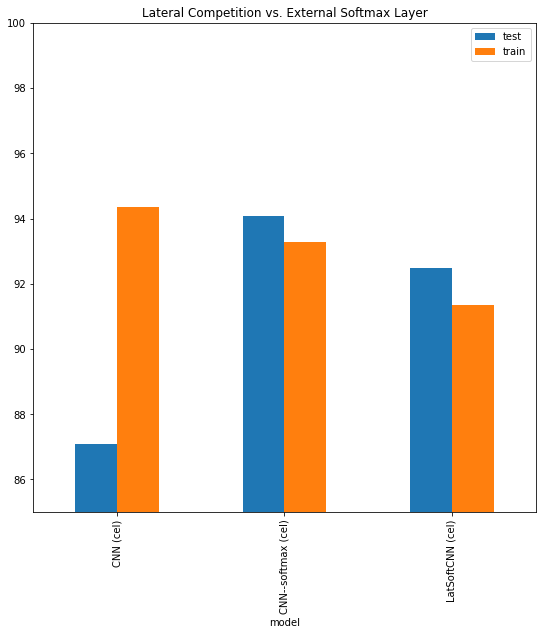

In [37]:
avgdf[avgdf['loss'] == 'cel'].plot.bar('model', ['test', 'train'], figsize = (9,9))
plt.gca().set_title('Lateral Competition vs. External Softmax Layer')
plt.ylim(85, 100)
plt.savefig('LatSoft_CNN_CNN--softmax_test_and_train_cel.png')

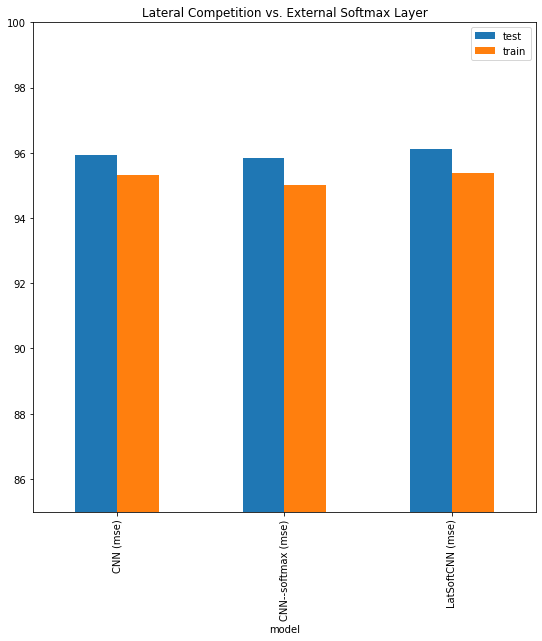

In [38]:
avgdf[avgdf['loss'] == 'mse'].plot.bar('model', ['test', 'train'], figsize = (9,9))
plt.gca().set_title('Lateral Competition vs. External Softmax Layer')
plt.ylim(85, 100)
plt.savefig('LatSoft_CNN_CNN--softmax_test_and_train_mse.png')